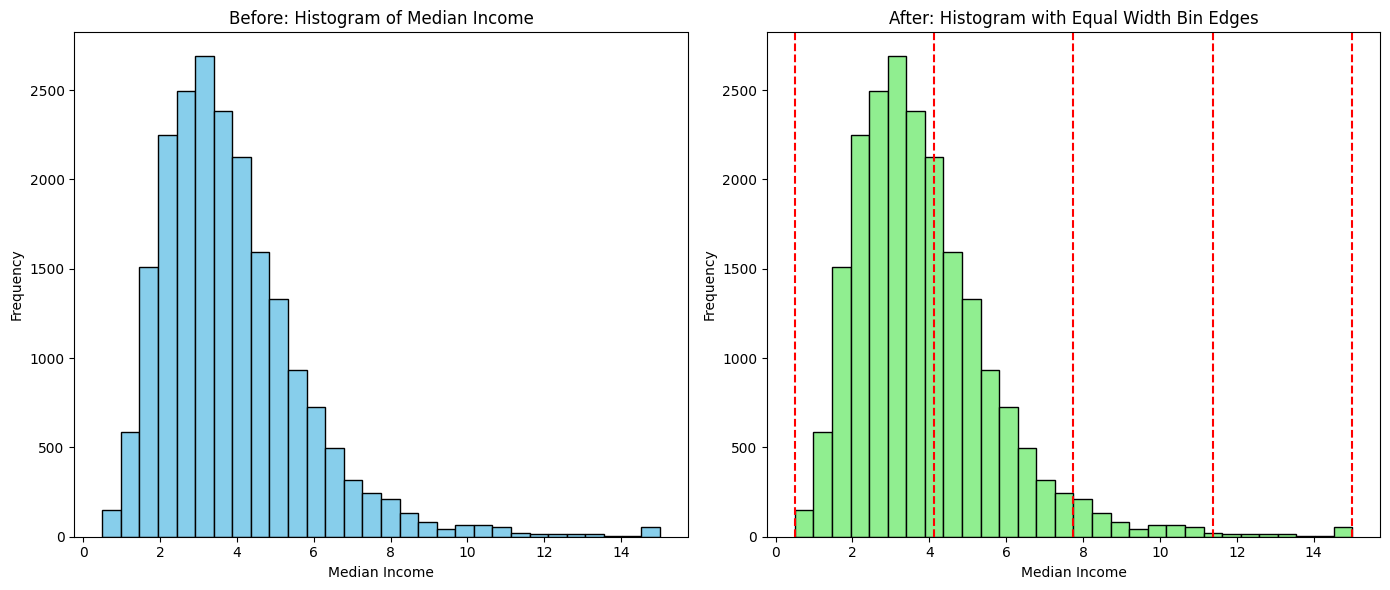

DataFrame with the new binned column:
   MedInc  MedInc_Binned
0  8.3252              2
1  8.3014              2
2  7.2574              1
3  5.6431              1
4  3.8462              0

Value counts for each bin:
MedInc_Binned
0    13167
1     6665
2      674
3      134
Name: count, dtype: int64

Bin Edges:
[ 0.4999   4.12495  7.75    11.37505 15.0001 ]


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# --- When to Use Equal Width Binning ---
# Equal width binning is a data preprocessing technique used to group a continuous
# variable into a smaller number of "bins" or intervals. Each bin has the same width.
#
# Use cases:
# - To reduce the effects of minor observation errors.
# - To convert continuous data into categorical data, which can be useful for
#   certain machine learning models.
# - To improve the performance of models that are sensitive to the distribution
#   of the data.
#
# Requirements:
# - The data should be a continuous numerical variable.
# - It is sensitive to outliers, which can result in bins with very few observations.

# --- Load the Dataset ---
# We'll use the California Housing dataset from scikit-learn.
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# --- Select a Feature ---
# We will apply equal width binning to the 'MedInc' (Median Income) feature.
feature_to_bin = 'MedInc'

# --- Apply Equal Width Binning ---
# We will divide the 'MedInc' into 4 bins of equal width.
num_bins = 4
# Create the bin edges. The width of each bin will be (max value - min value) / num_bins.
bin_edges = np.linspace(df[feature_to_bin].min(), df[feature_to_bin].max(), num_bins + 1)

# Create a new column for the binned data
binned_column_name = f'{feature_to_bin}_Binned'
df[binned_column_name] = pd.cut(df[feature_to_bin], bins=bin_edges, labels=False, include_lowest=True)

# --- Visualize the Results ---
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before binning: Histogram of the original 'MedInc' data
axes[0].hist(df[feature_to_bin], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Before: Histogram of Median Income')
axes[0].set_xlabel('Median Income')
axes[0].set_ylabel('Frequency')

# After binning: Histogram of the binned 'MedInc' data
# We plot the distribution of the original data, with vertical lines for the bin edges.
axes[1].hist(df[feature_to_bin], bins=30, color='lightgreen', edgecolor='black')
for edge in bin_edges:
    axes[1].axvline(x=edge, color='r', linestyle='--')
axes[1].set_title('After: Histogram with Equal Width Bin Edges')
axes[1].set_xlabel('Median Income')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# --- Display the Resulting DataFrame ---
# Print the head of the DataFrame with the new binned column.
print("DataFrame with the new binned column:")
print(df[[feature_to_bin, binned_column_name]].head())

# Display the value counts for each bin
print("\nValue counts for each bin:")
print(df[binned_column_name].value_counts().sort_index())

# Display the bin edges
print("\nBin Edges:")
print(bin_edges)
